# Delving into non-parametric methods using pandas and scipy

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sb

import scipy 
from scipy.stats import spearmanr

In [15]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 7
print(plt.style.available)
plt.style.use('Solarize_Light2')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## The Spearman rank correlation

In [4]:
address = "D:\data wrangling linked in learning\Data\mtcars.csv"

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [5]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


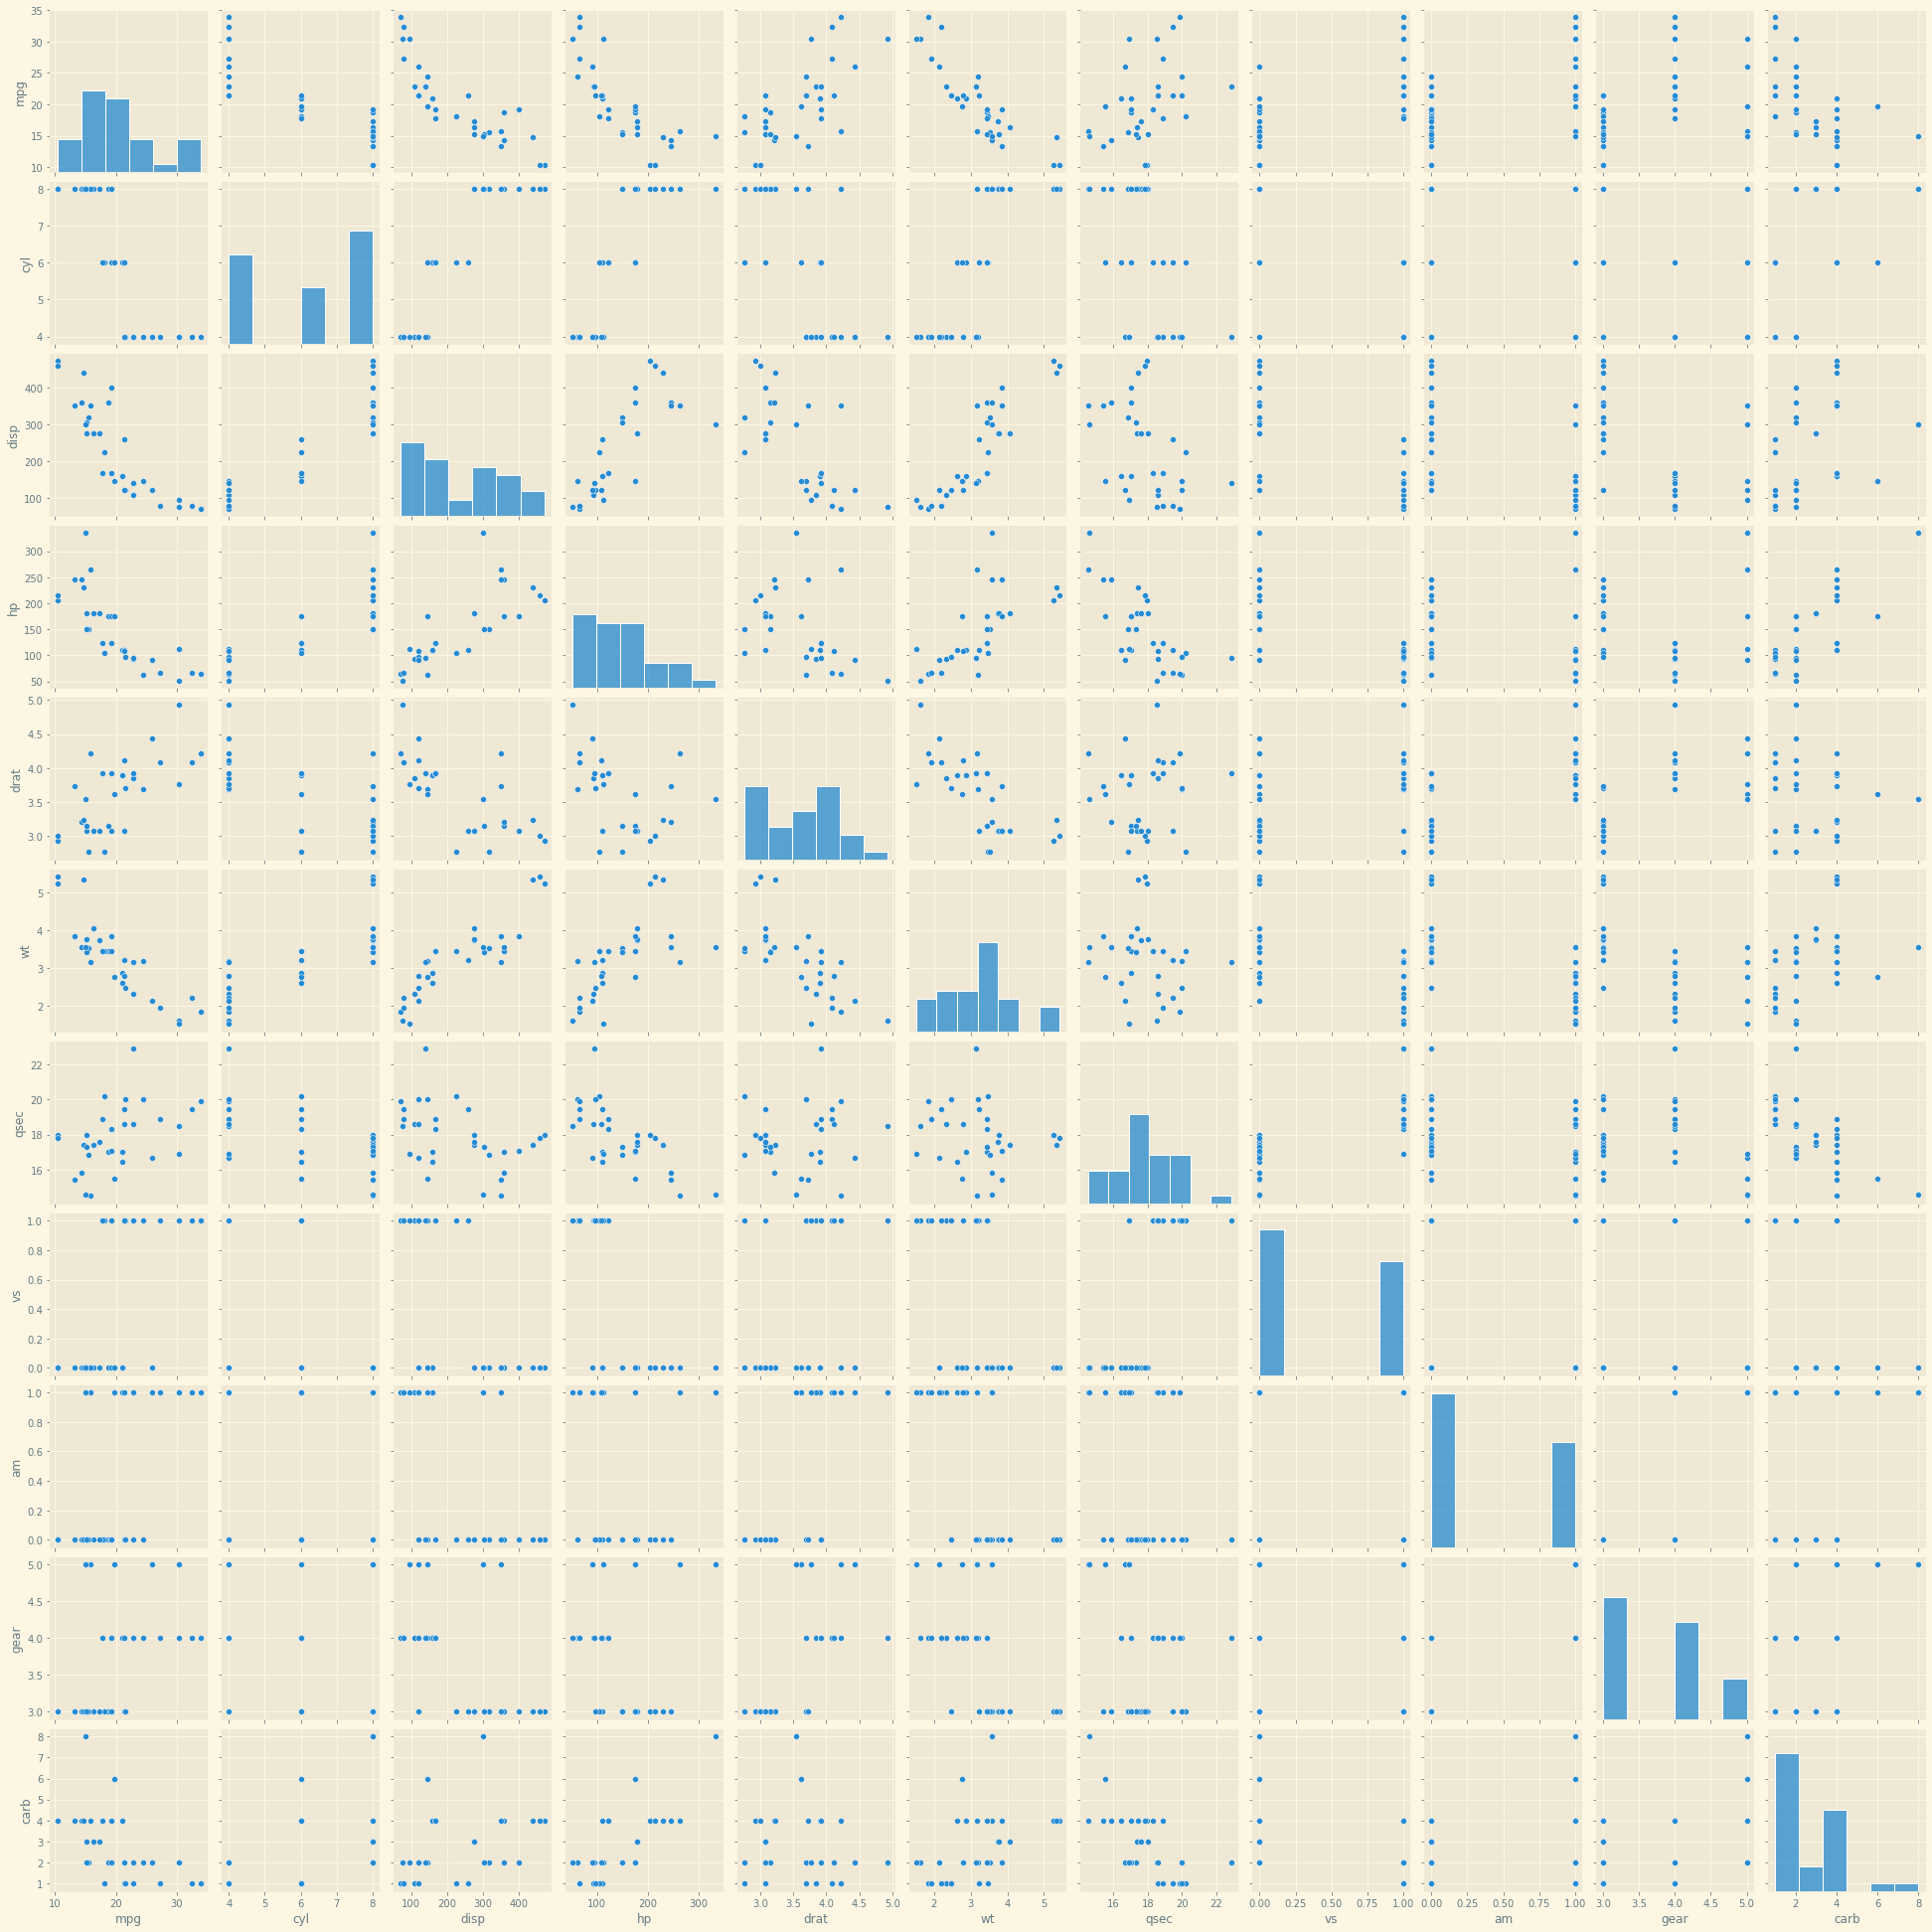

In [17]:
sb.pairplot(cars)

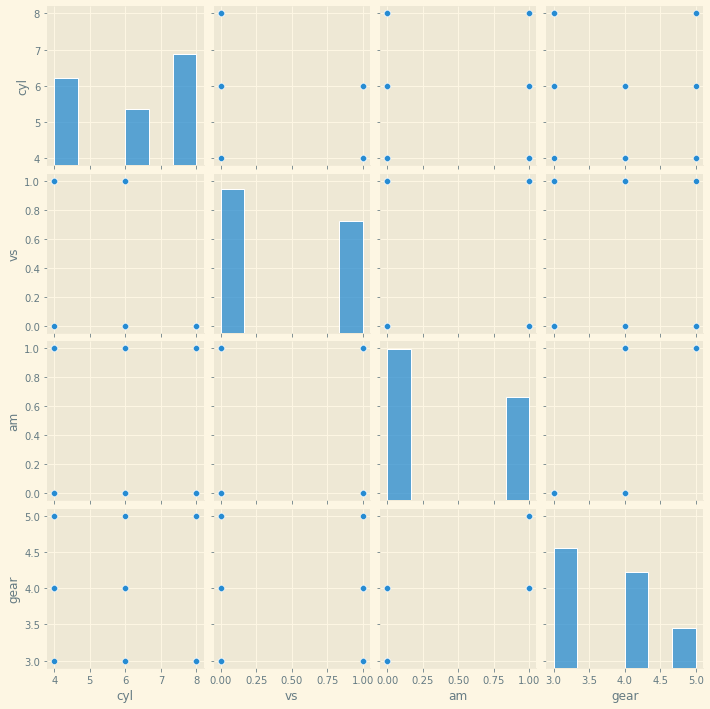

In [16]:
X = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(X)

In [18]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print('Spearman Rank correlation coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank correlation coefficient -0.814


In [19]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)

print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.522


In [20]:
spearmanr_coefficient, p_value = spearmanr(cyl, gear)

print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.564


## Chi-square test for indipendence

In [21]:
from scipy.stats import chi2_contingency

In [31]:
table = pd.crosstab(cyl, am)
print(table)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistics %0.3f p_value %0.3f' %(chi2, p))

am    0  1
cyl       
4     3  8
6     4  3
8    12  2
Chi-square statistics 8.741 p_value 0.013


In [32]:
table = pd.crosstab(cyl, vs)

chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 21.340 p_value 0.000


In [33]:
table = pd.crosstab(cyl, gear)

chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 18.036 p_value 0.001
